In [1]:
# Import the necessary libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [2]:
# Load the data 
df = pd.read_csv('carprices.csv') 
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


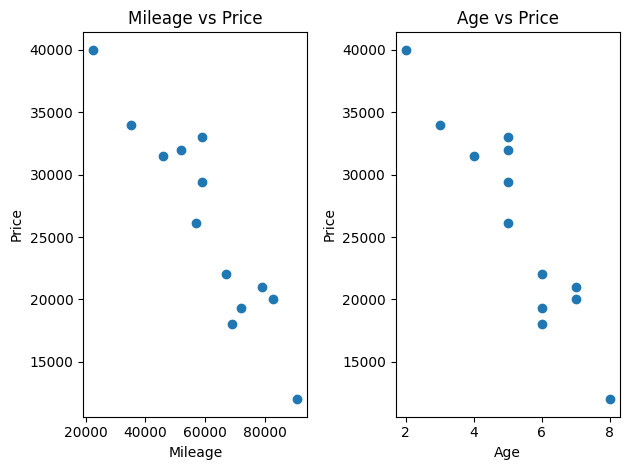

In [3]:
# Plot the graph to find the best model 

plt.subplot(1,2,1) 
plt.scatter(df.Mileage,df['Sell Price($)'])
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')

plt.subplot(1,2,2) 
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])
plt.title('Age vs Price')
plt.xlabel('Age')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [4]:
# Handle the nominal data using the dummy variables 
new_df = pd.get_dummies(df['Car Model'],dtype=int)
new_df

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [5]:
# Concatenate the two data frames 
concatenated = pd.concat([df,new_df],axis='columns')
concatenated

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [6]:
# Drop the redundant data 
final_df = concatenated.drop(['Car Model','Mercedez Benz C class'],axis=1)
final_df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [7]:
# Train the model 
X = final_df.drop(['Sell Price($)'],axis=1)
y = final_df['Sell Price($)'] 
print(X)
model = LinearRegression()
model.fit(X,y)

    Mileage  Age(yrs)  Audi A5  BMW X5
0     69000         6        0       1
1     35000         3        0       1
2     57000         5        0       1
3     22500         2        0       1
4     46000         4        0       1
5     59000         5        1       0
6     52000         5        1       0
7     72000         6        1       0
8     91000         8        1       0
9     67000         6        0       0
10    83000         7        0       0
11    79000         7        0       0
12    59000         5        0       0


LinearRegression()

In [8]:
# Predict 
model.predict([[59000,5,0,0]])

C:\Users\jalee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30477.15426156])

In [9]:
# Find the accuracy 
model.score(X,y)

0.9417050937281082